# Theory

The wave equation in one-dimensional form is written as

\begin{equation}
\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x}=0,
\end{equation}

where $u$ is the wave distribution in space $x$ and time $t$, and $c$ is wave velocity.

# Methods

## Backward Euler

\begin{equation}
\frac{u_j^{n+1} - u_j^n}{\Delta t}+c\frac{u_j^n - u_{j-1}^n}{\Delta x} = 0
\end{equation}

putting all $n+1$ terms on the left

\begin{equation}
u_j^{n+1} = u_j^n - \frac{c\Delta t}{\Delta x}(u_j^n - u_{j-1}^n)
\end{equation}

## Foreward Euler

\begin{equation}
\frac{u_j^{n+1} - u_j^n}{\Delta t}+c\frac{u_{j+1}^n - u_j^n}{\Delta x} = 0
\end{equation}

\begin{equation}
u_j^{n+1} = u_j^n - \frac{c\Delta t}{\Delta x}(u_{j+1}^n - u_{j}^n)
\end{equation}

## Forward Time Central Space (FTCS)

\begin{equation}
\frac{u_j^{n+1} - u_j^n}{\Delta t}+c\frac{u_{j+1}^n - u_{j-1}^n}{\Delta x} = 0
\end{equation}

\begin{equation}
u_j^{n+1} = u_j^n - \frac{c\Delta t}{2\Delta x}(u_{j+1}^n - u_{j-1}^n)
\end{equation}

## Leapfrog

\begin{equation}
u_j^{n+1} = u_j^{n-1} - \frac{c\Delta t}{\Delta x}(u_{j+1}^n - u_{j-1}^n)
\end{equation}

## Lax-Wendroff

\begin{equation}
u_j^{n+1} = u_j^n - \frac{c\Delta t}{2\Delta x}(u_{j+1}^n - u_{j-1}^n) + \frac{1}{2}(\frac{c\Delta t}{\Delta x})^{2}(u_{j+1}^n - 2u_j^n + u_{j-1}^n)
\end{equation}

## Lax

\begin{equation}
u_j^{n+1} = \frac{u_{j+1}^n + u_{j-1}^n}{2} - \frac{c\Delta t}{2\Delta x}(u_{j+1}^n - u_{j-1}^n)
\end{equation}

## Hybrid Theta

\begin{equation}
u_j^{n+1} + \theta(\frac{CFL}{2})(u_{j+1}^{n+1} - u_{j-1}^{n+1}) = u_j^n - (1-\theta)\frac{CFL}{2}(u_{j+1}^n - u_{j-1}^n)
\end{equation}

## 2nd order in time, 4th order in space (T2S4)

\begin{equation}
u_j^{n+1} = u_j^n - c\frac{\Delta t}{\Delta x}\Big[-\frac{u_{j+2}^n}{12} + \frac{2}{3}u_{j+1}^n -\frac{2}{3}u_{j-1}^n + \frac{u_{j-2}^n}{12}\Big] + \frac{1}{2}\Big(\frac{c\Delta t}{\Delta x}\Big)^2 \Big[-\frac{u_{j+2}^n}{12} + \frac{4}{3}u_{j+1}^n - \frac{5}{2}u_j^n + \frac{4}{3}u_{j-1}^n - \frac{u_{j-2}^n}{12} \Big]
\end{equation}

# Wave shape

Let's see how the wave moves.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_BE_1 = pd.read_csv('testCase/1-BE/results-t=0.00.csv')
df_BE_2 = pd.read_csv('testCase/1-BE/results-t=0.62.csv')
df_BE_3 = pd.read_csv('testCase/1-BE/results-t=1.30.csv')


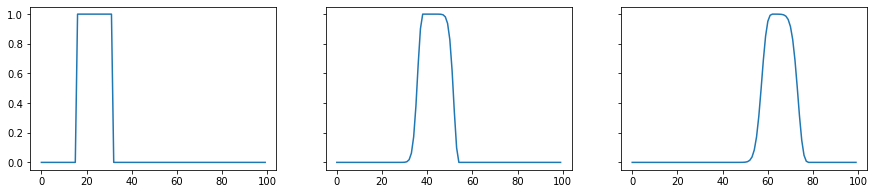

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,3))

y1 = df_BE_1['u']
y2 = df_BE_2['u']
y3 = df_BE_3['u']

ax1.plot(y1);
ax2.plot(y2);
ax3.plot(y3);

In [4]:
df_BE = pd.read_csv('testCase/1-BE/results-t=2.35.csv')
df_FE = pd.read_csv('testCase/2-FE/results-t=1.30.csv')
df_FTCS = pd.read_csv('testCase/3-FTCS/results-t=1.30.csv')
df_LF = pd.read_csv('testCase/4-Leapfrog/results-t=1.30.csv')
df_LW = pd.read_csv('testCase/5-Lax-Wendroff/results-t=1.30.csv')
df_Lax = pd.read_csv('testCase/6-Lax/results-t=1.30.csv')
df_HT = pd.read_csv('testCase/7-Hybrid-theta/results-65.csv')
df_T2S4 = pd.read_csv('testCase/8-T2S4/results-t=1.30.csv')

In [5]:
import matplotlib.ticker as ticker

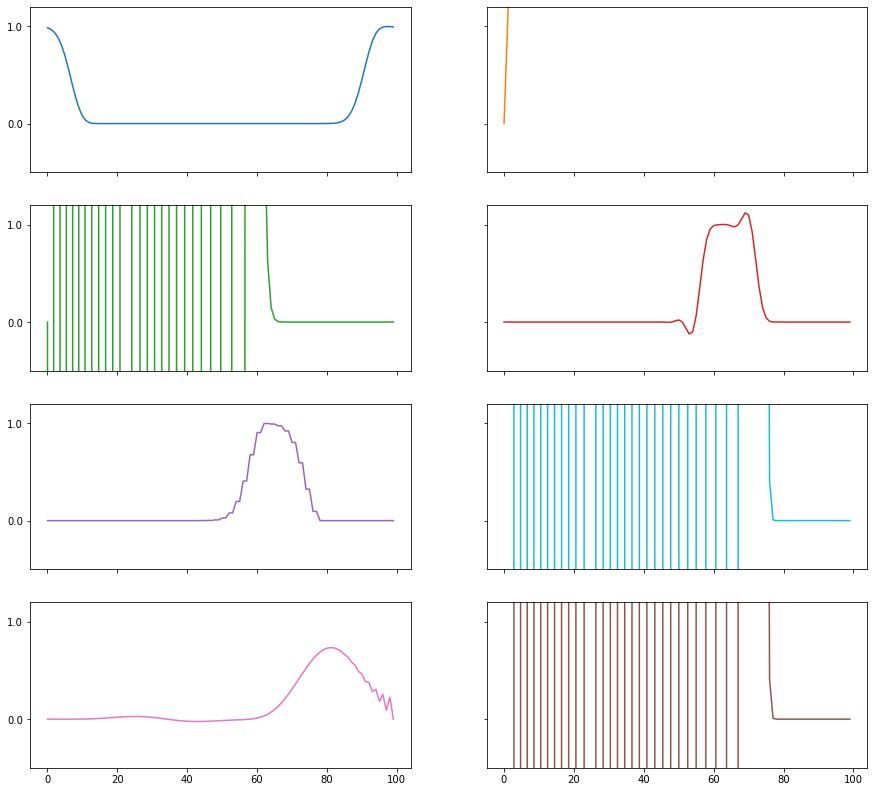

In [6]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15,14))

ax1.set(ylim=(-0.5, 1.2))

y1 = df_BE['u']
y2 = df_FE['u']
y3 = df_FTCS['u']
y4 = df_LF['u']
y5 = df_LW['u']
y6 = df_Lax['u']
y7 = df_HT['u']
y8 = df_T2S4['u']

ax1.plot(y1)
ax2.plot(y2, 'tab:orange')
ax3.plot(y3, 'tab:green')
ax4.plot(y4, 'tab:red')
ax5.plot(y5, 'tab:purple')
ax6.plot(y6, 'tab:cyan')
ax7.plot(y7, 'tab:pink')
ax8.plot(y8, 'tab:brown')

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

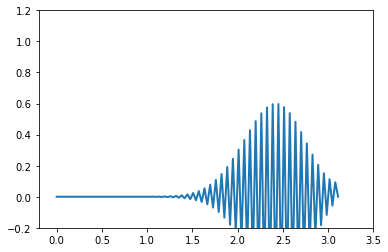

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure();
ax = plt.axes(xlim=(-0.2, 3.5), ylim=(-0.2, 1.2));
line, = ax.plot([], [], lw=2);

def init():
    line.set_data([], [])
    return line

def animate(i):
    filename = "testCase/7-Hybrid-theta/results-{}.csv".format(i)
    xy = np.genfromtxt(filename, delimiter=",")
    x = xy[:,0]; y = xy[:,1]
    line.set_data(x, y)
    return line

anim = animation.FuncAnimation(fig, animate, init_func = init, 
                               frames=110, interval=20, repeat=False)
HTML(anim.to_jshtml())